In [1]:
import numpy as np
from System_backend import *
import matplotlib.pyplot as plt
import ellipse as ell
import tqdm
#%matplotlib widget
%matplotlib inline
plt.rcParams["figure.figsize"] = (4,3)

In [2]:
ell_tot = 2000.
distance_anchor = 1000.
rho0 = 0.0001
temperature = 0.1
tau_0 = np.exp(1/temperature)
print(r'$\tau_0 = $'+str(tau_0))
S = System(ell_tot,rho0,temperature,seed=19880)

$\tau_0 = $22026.465794806718
System : creator
Strand : creator
Dangling : creator
Dangling : generate the binding sites
Dangling : compute the binding rates
Strand : clean the rates
Strand : compute all the binding rates
Strand : compute the total unbinding rate
Dangling : constructor over.
System : create dangling
Strand : creator
Dangling : creator
Dangling : generate the binding sites
Dangling : compute the binding rates
Strand : clean the rates
Strand : compute all the binding rates
Strand : compute the total unbinding rate
Dangling : constructor over.
System : created


In [3]:
print(S.get_r_size())
print(S.get_r_system_size())

1746
1746


In [4]:
linkers_system = S.get_r_system()
linkers_loop = S.get_r()
extremities = S.get_R()

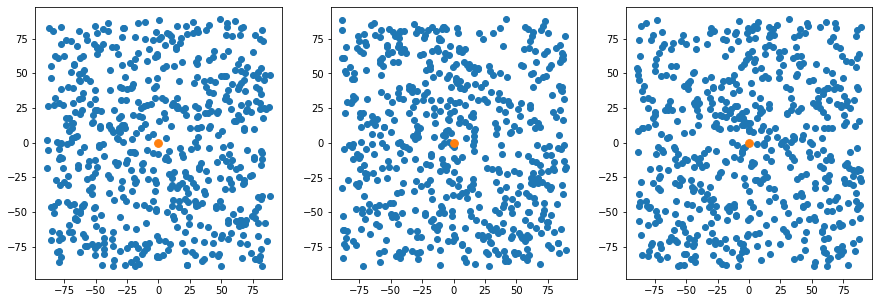

In [5]:
fig,ax = plt.subplots(ncols=3,figsize=(15,5))
ax[0].scatter(linkers_loop[:,1],linkers_loop[:,2])
ax[0].scatter(extremities[:,1],extremities[:,2],s=60)

ax[1].scatter(linkers_loop[:,0],linkers_loop[:,1])
ax[1].scatter(extremities[:,0],extremities[:,1],s=60)

ax[2].scatter(linkers_loop[:,0],linkers_loop[:,2])
ax[2].scatter(extremities[:,0],extremities[:,2],s=60)

In [6]:
for t in range(10):
    S.evolve()

: 

: 

In [10]:
S.get_R()

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [6.95286795e-310, 6.94595699e-310, 0.00000000e+000]])

In [20]:
S.get_r()[11]

array([0., 0., 0.])

In [7]:
N = list()
rsize = list()
Ell = list()
F = list()
for i in range(1000):
    S.evolve()
    N.append(S.get_N_loop())
    rsize.append(S.get_r().shape[0])
    Ell.append(sum(S.get_ell()))
    F.append(S.get_F())
N = np.array(N)
rsize=np.array(rsize)
Ell= np.array(Ell)
F = np.array(F)

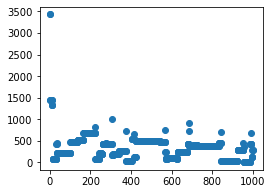

In [8]:
plt.close()
#plt.scatter(np.arange(0,N.shape[0],1),N)
#plt.scatter(np.arange(0,rsize.shape[0],1),rsize)
#plt.scatter(np.arange(0,Ell.shape[0],1),Ell)
plt.scatter(np.arange(0,F.shape[0],1),F)

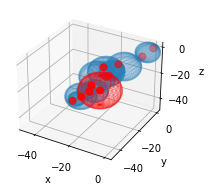

In [9]:
plt.close()
fig,ax = S.Plot3DSystem()
#plt.close()

: 

: 

In [6]:
print(S.get_ell())
print(S.get_R())

[642.]
[[  0.           0.           0.        ]
 [-16.097395   -26.77912392  -2.05946978]]


In [4]:
time_tot = 10000
Ells = np.zeros(time_tot,dtype=float)
Ns = np.zeros(time_tot,dtype=float)
time_bind = list()
time_ub = list()
time = np.zeros(time_tot,dtype=float)
for t in tqdm.tqdm(range(time_tot)):
    bind, dt = S.evolve()
#    for n,ell in enumerate(S.get_ell()):
#        if ell<np.linalg.norm(S.get_R()[n+1]-S.get_R()[n]):
#            print(bind)
#            print(S.get_ell())
#            print(S.get_R())
#            for n,ell in enumerate(S.get_ell()):
#                print(np.linalg.norm(S.get_R()[n+1]-S.get_R()[n]))
#            raise SystemExit('error in code want to exit')
    R = S.get_R()       
    r = S.get_r()
    if bind :
        time_bind.append(dt)
    else:
        time_ub.append(dt)
    if t!=0:
        time[t]= time[t-1]+dt
    else:
        time[t] = dt
    Ells[t] = np.mean(S.get_ell())
    Ns[t] = S.get_N_loop()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 11577.02it/s]


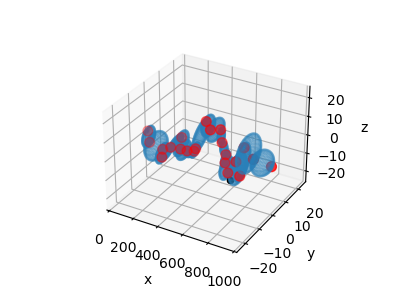

In [5]:
plt.close()
fig,ax = S.Plot3DSystem()
plt.show()

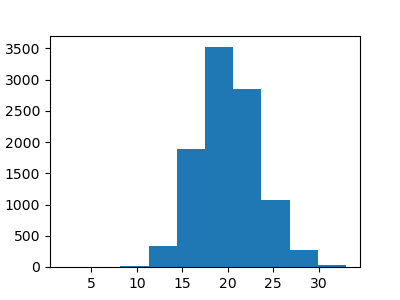

In [6]:
plt.close()
plt.hist(Ns)
plt.show()


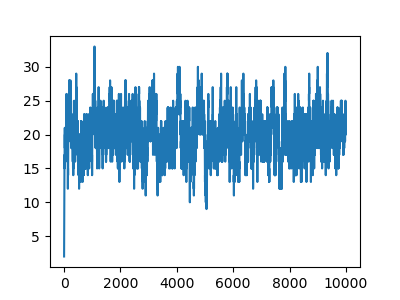

In [7]:
plt.close()
fig,ax = plt.subplots()
#lt.plot(np.arange(0,time_tot,1),time/tau_0)
plt.plot(np.arange(0,time_tot,1),Ns)
#plt.hist(time_bind,bins=100)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [8]:
S.get_ell()

array([ 77., 179.,  77.,  46.,  40., 116.,  83.,  32.,  49., 104.,  87.,
       120.,  27.,  23.,  45.,  98.,  68., 171., 146., 284., 128.])